# LOICA DEMO: SBOL Integration

In this demo, we will show: 

- How to use LOICA library to integrate SBOL components into a design. 
- How to examine designs by drawing their network representation.
- How to save and load LOICA objects and designs.

The Source component has a more deep explanation of the code, the following Operators have the same pattern in a less verbose way.

# Imports

Here are listed all the necessary imports. Notice that we are using functions under development in sbol_utilities available at https://github.com/Gonza10V/SBOL-utilities.

To use LOICA and Flapjack please install the packages using following commands:

pip install loica

pip install pyflapjack

In [1]:
import sbol3
from sbol_utilities import component
from flapjack import Flapjack
import loica as lc
import getpass

%matplotlib inline

In order to access to data stored in Flapjack we need to, first, provide a valid Flapjack instance. This can be done by providing the URL of the Flapjack web instance or Flapjack local instance. Second, you need to log in with your Flapjack credentials.

If you are not registered, you can create an account for free [Here](http://flapjack.rudge-lab.org/authentication?initialTab=signup) 

In [2]:
user = input()
passwd = getpass.getpass()
fj = Flapjack('flapjack.rudge-lab.org:8000') #Web Instance
#fj = Flapjack(url_base='localhost:8000') #Local Instance
fj.log_in(username=user, password=passwd)

# Source

This LOICA object is an abstraction of a promoter under constitutive expression.

## Flapjack connection

All the necessary Flapjack objects and ids that we will need for two-way communication.

In [3]:
dna = fj.get('dna', name='J23101_GFP')
if len(dna)==0:
    dna = fj.create('dna', name='J23101_GFP')
vector = fj.get('vector', name='J23101_GFP')    
if len(vector)==0:
    vector = fj.create('vector', name='J23101_GFP', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')
if len(gfp)==0:
    gfp = fj.create('signal', name='GFP', color='green', description='Simulated green fluorescent protein')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

A valid SBOL Document with the sequences and parts that we will use in the design. Here we create the J23101 Operator as an Engineered Region composed by the promoter J23101 and the BASIC RBS1 (derived from BBa_B0033). We create the GFP GeneProduct also as an Engineering Region now composed by GFP CDS, M0050 degradation tag and rrnbT1 terminator. 

In [4]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

j23101, j23101_seq = component.promoter('J23101','tttacagctagctcagtcctaggtattatgctagc ', description='https://synbiohub.org/public/igem/BBa_J23101/1')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')

op_j23101 = component.engineered_region('operator_ptet', [j23101,rbs1], description= 'LOICA Operator J23101')

gfpm3, gfpm3_seq = component.cds('GFP_mut3', 'atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagcgcgaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaa', description='GFP mut3 Coding Sequence, no BsaI site, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')

gp_gfp = component.engineered_region(f'geneproduct_{gfpm3.display_id}_{m0050.display_id}_{ter1.display_id}', [gfpm3, m0050, ter1], description='LOICA GeneProduct GFP')

doc.add([j23101, j23101_seq, rbs1, rbs1_seq, op_j23101, gfpm3, gfpm3_seq, m0050, m0050_seq, ter1, ter1_seq, gp_gfp])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/J23101
https://github.com/Gonza10V/J23101_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
0


## GeneticNetwork Construction

Instantiated objects are connected with Flapjack through ids and with SBOL through Components.

An inspection of the design can be made by drawing its network representation.

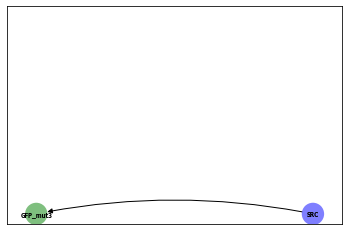

In [5]:
src = lc.GeneticNetwork(vector=vector.id[0])

gfp_rep = lc.Reporter(name='GFP_mut3', degradation_rate=1, signal_id=gfp.id[0], sbol_comp=gp_gfp, color='green')
src.add_reporter(gfp_rep)

j23101_source_gfp = lc.Source(output=gfp_rep, rate=10, sbol_comp=op_j23101)
src.add_operator(j23101_source_gfp)
src.draw()

LOICA GeneticNetwork can produce new SBOL Documents or add to the initial one the new Components.
This facilitate the creation of complex SBOL files providing only transcriptional unit compositional information.

In [6]:
source_doc = src.to_sbol(sbol_doc=doc)
for obj in source_doc.objects:
    print(obj.identity)
report_sbol3 = source_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/J23101
https://github.com/Gonza10V/J23101_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LOICAc_SRC_GFP_mut3_model
https://github.com/Gonza10V/TU_c_SRC_GFP_mut3
https://github.com/Gonza10V/GFP_mut3_protein
https://github.com/Gonza10V/geneticnetwork
0


If you have errors in your conversion you can print them using the following script

In [7]:
for error in report_sbol3.errors:
    print(error.object_id)
    print(error.message)

# Buffer (Hill1)

## Flapjack Connection

In [8]:
dna = fj.get('dna', name='_BUF_GFP')
if len(dna)==0:
    dna = fj.create('dna', name='AHL1_NOT_GFP')
vector = fj.get('vector', name='AHL1_NOT_GFP')    
if len(vector)==0:
    vector = fj.create('vector', name='AHL1_NOT_GFP', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [9]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

hsl_c4 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329748866')
prhl, prhl_seq = component.promoter('pRhl','cagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttcTACTaGAGACCcacgtagtg ', description='https://synbiohub.org/public/igem/BBa_J23101/1')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
op_prhl = component.engineered_region('operator_ptet', [prhl,rbs1], description= 'LOICA Operator pRhl')

gfpm3, gfpm3_seq = component.cds('GFP_mut3', 'atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagcgcgaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaa', description='GFP mut3 Coding Sequence, no BsaI site, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')
gp_gfp = geneproduct = component.engineered_region(f'geneproduct_{gfpm3.display_id}_{m0050.display_id}_{ter1.display_id}', [gfpm3, m0050, ter1], description='LOICA GeneProduct GFP')

doc.add([prhl, prhl_seq, rbs1, rbs1_seq, op_prhl, gfpm3, gfpm3_seq, m0050, m0050_seq, ter1, ter1_seq, gp_gfp])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
0


## GeneticNetwork Construction

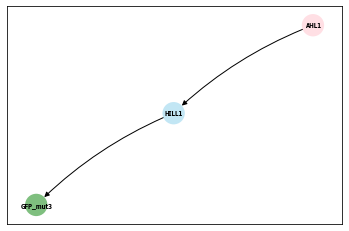

In [10]:
rec = lc.GeneticNetwork(vector=vector.id[0])

gfp_rep = lc.Reporter(name='GFP_mut3', degradation_rate=1, signal_id=gfp.id[0], sbol_comp=gp_gfp, color='green')
rec.add_reporter(gfp_rep)

ahl1 = lc.Supplement(name='AHL1', sbol_comp=hsl_c4)

ahl1_BUF_gfp = lc.Hill1(input=ahl1, output=gfp_rep, alpha=[0, 100], K=1, n=2, sbol_comp=op_prhl)
rec.add_operator(ahl1_BUF_gfp)
rec.draw()

In [11]:
rec_doc = rec.to_sbol(sbol_doc=doc)
for obj in rec_doc.objects:
    print(obj.identity)
report_sbol3 = rec_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LOICA_AHL1_HILL1_GFP_mut3_model
https://github.com/Gonza10V/TU_AHL1_HILL1_GFP_mut3
https://github.com/Gonza10V/GFP_mut3_protein
https://github.com/Gonza10V/AHL1_chemical
https://github.com/Gonza10V/geneticnetwork
0


# NOT (Hill1)

## Flapjack Connection

In [12]:
dna = fj.get('dna', name='LacI_NOT_GFP')
if len(dna)==0:
    dna = fj.create('dna', name='LacI_NOT_GFP')
vector = fj.get('vector', name='LacI_NOT_GFP')    
if len(vector)==0:
    vector = fj.create('vector', name='LacI_NOT_GFP', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [13]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

plac, plac_seq = component.promoter('L3S2P11_UPA20_pLac_RiboJ10', 'GTCCCTCGGTACCAAATTCCAGAAAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTcctttcgtcttcacctcgagaattgtgagcggataacaattgacattgtgagcggataacaagatactgagcacatcagcaggacgcactgaccgaattcattAGCGCTCAACGGGTGTGCTTCCCGTTCTGATGAGTCCGTGAGGACGAAAGCGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin pLac (based on B-P39-pLac-F2)')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
op_plac = component.engineered_region('operator_ptet', [plac,rbs1], description= 'LOICA Operator pLac')

gfpm3, gfpm3_seq = component.cds('GFP_mut3', 'atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagcgcgaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaa', description='GFP mut3 Coding Sequence, no BsaI site, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')
gp_gfp = geneproduct = component.engineered_region(f'geneproduct_{gfpm3.display_id}_{m0050.display_id}_{ter1.display_id}', [gfpm3, m0050, ter1], description='LOICA GeneProduct GFP')

laci, laci_seq = component.cds('LacI', 'GTCCatggtgaatgtgaaaccagtaacgttatacgatgtcgcagagtatgccggtgtctcttatcagaccgtttcccgcgtggtgaaccaggccagccacgtttctgcgaaaacgcgggaaaaagtggaagcggcgatggcggagctgaattacattcccaaccgcgtggcacaacaactggcgggcaaacagtcgttgctgattggcgttgccacctccagtctggccctgcacgcgccgtcgcaaattgtcgcggcgattaaatctcgcgccgatcaactgggtgccagcgtggtggtgtcgatggtagaacgaagcggcgtcgaagcctgtaaagcggcggtgcacaatcttctcgcgcaacgcgtcagtgggctgatcattaactatccgctggatgaccaggatgccattgctgtggaagctgcctgcactaatgttccggcgttatttcttgatgtctctgaccagacacccatcaacagtattattttctcccatgaagacggtacgcgactgggcgtggagcatctggtcgcattgggtcaccagcaaatcgcgctgttagcgggcccattaagttctgtctcggcgcgtctgcgtctggctggctggcataaatatctcactcgcaatcaaattcagccgatagcggaacgggaaggcgactggagtgccatgtccggttttcaacaaaccatgcaaatgctgaatgagggcatcgttcccactgcgatgctggttgccaacgatcagatggcgctgggcgcaatgcgcgccattaccgagtccgggctgcgcgttggtgcggatatctcggtagtgggatacgacgataccgaagacagctcatgttatatcccgccgttaaccaccatcaaacaggattttcgcctgctggggcaaaccagcgtggaccgcttgctgcaactctctcagggccaggcggtgaagggcaatcagctgttgcccgtctcactggtgaaaagaaaaaccaccctggcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagGGCTCG', description='LacI Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
gp_laci = geneproduct = component.engineered_region(f'geneproduct_{laci.display_id}_{m0050.display_id}_{ter1.display_id}', [laci, m0050, ter1], description='LOICA GeneProduct LacI')

doc.add([plac, plac_seq, rbs1, rbs1_seq, op_plac, gfpm3, gfpm3_seq, m0050, m0050_seq, ter1, ter1_seq, gp_gfp, laci, laci_seq, gp_laci])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/geneproduct_LacI_M0050_TER1
0


## GeneticNetwork Construction

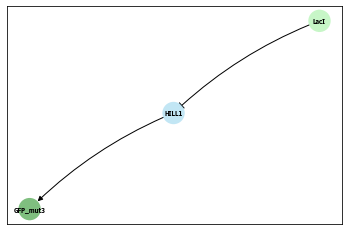

In [14]:
inv = lc.GeneticNetwork(vector=vector.id[0])

gfp_rep = lc.Reporter(name='GFP_mut3', degradation_rate=1, signal_id=gfp.id[0], sbol_comp=gp_gfp, color='green')
inv.add_reporter(gfp_rep)

laci_reg = lc.Regulator(name='LacI', degradation_rate=1, init_concentration=5, sbol_comp=gp_laci)
inv.add_regulator(laci_reg)

laci_NOT_gfp = lc.Hill1(input=laci_reg, output=gfp_rep, alpha=[100,0], K=1, n=2, sbol_comp=op_plac)
inv.add_operator(laci_NOT_gfp)
inv.draw()

In [15]:
inv_doc = inv.to_sbol(sbol_doc=doc)
for obj in inv_doc.objects:
    print(obj.identity)
report_sbol3 = inv_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/geneproduct_LacI_M0050_TER1
https://github.com/Gonza10V/LOICA_LacI_HILL1_GFP_mut3_model
https://github.com/Gonza10V/TU_LacI_HILL1_GFP_mut3
https://github.com/Gonza10V/GFP_mut3_protein
https://github.com/Gonza10V/LacI_protein
https://github.com/Gonza10V/geneticnetwork
0


In [16]:
for error in report_sbol3.errors:
    print(error.object_id)
    print(error.message)

# Receiver

## Flapjack Connection

In [17]:
dna = fj.get('dna', name='AHL1_REC_GFP')
if len(dna)==0:
    dna = fj.create('dna', name='AHL1_REC_GFP')
vector = fj.get('vector', name='AHL1_REC_GFP')    
if len(vector)==0:
    vector = fj.create('vector', name='AHL1_REC_GFP', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [18]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

hsl_c4 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329748866')
prhl, prhl_seq = component.promoter('pRhl','cagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttcTACTaGAGACCcacgtagtg ', description='https://synbiohub.org/public/igem/BBa_J23101/1')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
op_prhl = component.engineered_region('operator_ptet', [prhl,rbs1], description= 'LOICA Operator pRhl')

gfpm3, gfpm3_seq = component.cds('GFP_mut3', 'atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagcgcgaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaa', description='GFP mut3 Coding Sequence, no BsaI site, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')
gp_gfp = geneproduct = component.engineered_region(f'geneproduct_{gfpm3.display_id}_{m0050.display_id}_{ter1.display_id}', [gfpm3, m0050, ter1], description='LOICA GeneProduct GFP')

doc.add([prhl, prhl_seq, rbs1, rbs1_seq, op_prhl, gfpm3, gfpm3_seq, m0050, m0050_seq, ter1, ter1_seq, gp_gfp])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
0


## GeneticNetwork Construction

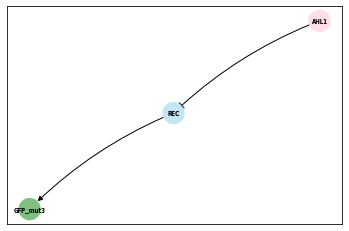

In [19]:
rec = lc.GeneticNetwork(vector=vector.id[0])

gfp_rep = lc.Reporter(name='GFP_mut3', degradation_rate=1, signal_id=gfp.id[0], sbol_comp=gp_gfp, color='green')
rec.add_reporter(gfp_rep)

ahl1 = lc.Supplement(name='AHL1', sbol_comp=hsl_c4)

ahl1_REC_gfp = lc.Receiver(input=ahl1, output=gfp_rep, alpha=[100,0], K=1, n=2, sbol_comp=op_prhl)
rec.add_operator(ahl1_REC_gfp)
rec.draw()

In [20]:
rec_doc = rec.to_sbol(sbol_doc=doc)
for obj in rec_doc.objects:
    print(obj.identity)
report_sbol3 = rec_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LOICA_AHL1_REC_GFP_mut3_model
https://github.com/Gonza10V/TU_AHL1_REC_GFP_mut3
https://github.com/Gonza10V/GFP_mut3_protein
https://github.com/Gonza10V/AHL1_chemical
https://github.com/Gonza10V/geneticnetwork
0


# NOR

## Flapjack Connection

In [21]:
dna_rec1 = fj.get('dna', name='AHL1_REC_LacI')
if len(dna_rec1)==0:
    dna_rec1 = fj.create('dna', name='AHL1_REC_TetR')

dna_rec2 = fj.get('dna', name='AHL2_REC_LacI')
if len(dna_rec2)==0:
    dna_rec2 = fj.create('dna', name='AHL2_REC_LacI')

dna_NOR = fj.get('dna', name='LacI_TetR_NOR_GFP')
if len(dna_NOR)==0:
    dna_NOR = fj.create('dna', name='LacI_TetR_NOR_GFP')

vector = fj.get('vector', name='AHL1_AHL2_NOR_GFP')    
if len(vector)==0:
    vector = fj.create('vector', name='AHL1_AHL2_NOR_GFP', dnas=[dna_rec1.id, dna_rec2.id, dna_NOR.id])   

study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')

media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')

strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [22]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

tdm_pro, tdm_pro_seq = component.promoter('TP_laci_tetr','cagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttccctttccgaaacgaaacaagttggattttgccagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttccctttccgaaacgaaacaagttggattttgc acctaccagaactggtagttctgacctgtggctatcttcgaaggcatcgatattatgcacattggaactcttcatgacataacgccgagTACTaGAGACCcacgtagtg ', description='https://synbiohub.org/public/igem/BBa_J23101/1')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')

op_tdm_pro = component.engineered_region('operator_tdm_laci_ptet', [tdm_pro,rbs1], description= 'LOICA Operator J23101')

gfpm3, gfpm3_seq = component.cds('GFP_mut3', 'atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagcgcgaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaa', description='GFP mut3 Coding Sequence, no BsaI site, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')

gp_gfp = geneproduct = component.engineered_region(f'geneproduct_{gfpm3.display_id}_{m0050.display_id}_{ter1.display_id}', [gfpm3, m0050, ter1], description='LOICA GeneProduct GFP')

hsl_c4 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329748866')
hsl_c6 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329748862')
doc.add([tdm_pro, tdm_pro_seq, rbs1, rbs1_seq, op_tdm_pro, gfpm3, gfpm3_seq, m0050, m0050_seq, ter1, ter1_seq, gp_gfp])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/TP_laci_tetr
https://github.com/Gonza10V/TP_laci_tetr_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_tdm_laci_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
0


## GeneticNetwork Construction

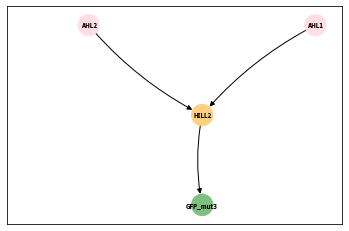

In [23]:
nor_ex = lc.GeneticNetwork(vector=vector.id[0])

gfp_rep = lc.Reporter(name='GFP_mut3', degradation_rate=1, signal_id=gfp.id[0], sbol_comp=gp_gfp, color='green')
nor_ex.add_reporter(gfp_rep)

ahl1 = lc.Supplement(name='AHL1', sbol_comp=hsl_c4)
ahl2 = lc.Supplement(name='AHL2', sbol_comp=hsl_c6)

nor_ex.add_operator(lc.Hill2(input=[ahl1, ahl2], output=gfp_rep, 
                    alpha=[0.0001,1,1,0], K=[1,1], n=[2,2], sbol_comp=op_tdm_pro))
nor_ex.draw()

In [24]:
nor_doc = nor_ex.to_sbol(sbol_doc=doc)
for obj in nor_doc.objects:
    print(obj.identity)
report_sbol3 = nor_doc.validate()
print(len(report_sbol3))

Unsupported operator Type
Unsupported operator Type
https://github.com/Gonza10V/TP_laci_tetr
https://github.com/Gonza10V/TP_laci_tetr_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_tdm_laci_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LOICA_AHL1_AHL2_HILL2_GFP_mut3_model
https://github.com/Gonza10V/TU_AHL1_AHL2_HILL2_GFP_mut3
https://github.com/Gonza10V/GFP_mut3_protein
https://github.com/Gonza10V/AHL2_chemical
https://github.com/Gonza10V/AHL1_chemical
https://github.com/Gonza10V/geneticnetwork
0


# Reppresilator

This genetic network is a ring oscillator composed by 3 NOT Operators.

## Flapjack Connection

In [25]:
dna = fj.get('dna', name='Rep')
if len(dna)==0:
    dna = fj.create('dna', name='Rep')
vector = fj.get('vector', name='Rep')    
if len(vector)==0:
    vector = fj.create('vector', name='Rep', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
cfp = fj.get('signal', name='CFP')
if len(cfp)==0:
    cfp = fj.create('signal', name='CFP', color='cyan', description='Simulated cyan fluorescent protein')
yfp = fj.get('signal', name='YFP')
if len(yfp)==0:
    yfp = fj.create('signal', name='YFP', color='yellow', description='Simulated yellow fluorescent protein')
rfp = fj.get('signal', name='RFP')
if len(rfp)==0:
    rfp = fj.create('signal', name='RFP', color='red', description='Simulated red fluorescent protein')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [26]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

ptet, ptet_seq = component.promoter('L3S2P21_UPA20_pTetR_RiboJ','GTCCCTCGGTACCAAATTCCAGAAAAGAGGCCTCCCGAAAGGGGGGCCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTtccctatcagtgatagagattgacatccctatcagtgatagagatactgagcacatcagcaggacgcactgaccAGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACGAAACAGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin pTet (based on B-P27-pTetR-F1)')
plac, plac_seq = component.promoter('L3S2P11_UPA20_pLac_RiboJ10', 'GTCCCTCGGTACCAAATTCCAGAAAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTcctttcgtcttcacctcgagaattgtgagcggataacaattgacattgtgagcggataacaagatactgagcacatcagcaggacgcactgaccgaattcattAGCGCTCAACGGGTGTGCTTCCCGTTCTGATGAGTCCGTGAGGACGAAAGCGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin pLac (based on B-P39-pLac-F2)')
plam, plam_seq = component.promoter('L3S1P13_UPA20_plambda_RiboJ51', 'GTCCGACGAACAATAAGGCCTCCCTAACGGGGGGCCTTTTTTATTGATAACAAAAGTGCCTACTCTGGAAAATCTccgccgccctagacctagctgcaggtcgaggataaatatctaacaccgtgcgtgttgactattttacctctggcggtgataatggttgcatgtactagaattcattAGTAGTCACCGGCTGTGCTTGCCGGTCTGATGAGCCTGTGAAGGCGAAACTACCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin plambda (based on B-P41-pPhlF-F3)')

op_ptet = component.engineered_region('operator_ptet', [ptet], description= 'LOICA Operator pTet')
op_plac = component.engineered_region('operator_plac', [plac], description='LOICA Operator pLac')
op_plam = component.engineered_region('operator_plam', [plam], description='LOICA Operator pLambda')

toplevels = [ptet, ptet_seq, plac, plac_seq, plam, plam_seq, op_ptet, op_plac, op_plam]
doc.add(toplevels)

operators = [op_ptet, op_plac, op_plam]

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ
https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ_seq
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/operator_plac
https://github.com/Gonza10V/operator_plam
0


In [27]:
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
rbs2, rbs2_seq = component.rbs('RBS2', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAaaagaggggaaata', description='BASIC Linker RBS2')
rbs3, rbs3_seq = component.rbs('RBS3', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAaaagaggagaaata', description='BASIC Linker RBS3')

mven, mven_seq = component.cds('mVenus', 'GTCCCTCGGTACCAAATTCCAGAAAAGAGGCCTCCCGAAAGGGGGGCCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTtccctatcagtgatagagattgacatccctatcagtgatagagatactgagcacatcagcaggacgcactgaccAGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACGAAACAGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='mVenus Coding Sequence from Potvin-Trottier pLPT119, no BasI site, no stop codon')
tetr, tetr_seq = component.cds('TetR', 'GTCCatgtccagattagataaaagtaaagtgattaacagcgcattagagctgcttaatgaggtcggaatcgaaggtttaacaacccgtaaactcgcccagaagctaggtgtagagcagcctacattgtattggcatgtaaaaaataagcgggctttgctcgacgccttagccattgagatgttagataggcaccatactcacttttgccctttagaaggggaaagctggcaagattttttacgtaataacgctaaaagttttagatgtgctttactaagtcatcgcgatggagcaaaagtacatttaggtacacggcctacagaaaaacagtatgaaactctcgaaaatcaattagcctttttatgccaacaaggtttttcactagagaatgcattatatgcactcagcgctgtggggcattttactttaggttgcgtattggaagatcaagagcatcaagtcgctaaagaagaaagggaaacacctactactgatagtatgccgccattattacgacaagctatcgaattatttgatcaccaaggtgcagagccagccttcttattcggccttgaattgatcatatgcggattagaaaaacaacttaaatgtgaaagtgggtctGGCTCG',description='TetR Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
laci, laci_seq = component.cds('LacI', 'GTCCatggtgaatgtgaaaccagtaacgttatacgatgtcgcagagtatgccggtgtctcttatcagaccgtttcccgcgtggtgaaccaggccagccacgtttctgcgaaaacgcgggaaaaagtggaagcggcgatggcggagctgaattacattcccaaccgcgtggcacaacaactggcgggcaaacagtcgttgctgattggcgttgccacctccagtctggccctgcacgcgccgtcgcaaattgtcgcggcgattaaatctcgcgccgatcaactgggtgccagcgtggtggtgtcgatggtagaacgaagcggcgtcgaagcctgtaaagcggcggtgcacaatcttctcgcgcaacgcgtcagtgggctgatcattaactatccgctggatgaccaggatgccattgctgtggaagctgcctgcactaatgttccggcgttatttcttgatgtctctgaccagacacccatcaacagtattattttctcccatgaagacggtacgcgactgggcgtggagcatctggtcgcattgggtcaccagcaaatcgcgctgttagcgggcccattaagttctgtctcggcgcgtctgcgtctggctggctggcataaatatctcactcgcaatcaaattcagccgatagcggaacgggaaggcgactggagtgccatgtccggttttcaacaaaccatgcaaatgctgaatgagggcatcgttcccactgcgatgctggttgccaacgatcagatggcgctgggcgcaatgcgcgccattaccgagtccgggctgcgcgttggtgcggatatctcggtagtgggatacgacgataccgaagacagctcatgttatatcccgccgttaaccaccatcaaacaggattttcgcctgctggggcaaaccagcgtggaccgcttgctgcaactctctcagggccaggcggtgaagggcaatcagctgttgcccgtctcactggtgaaaagaaaaaccaccctggcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagGGCTCG', description='LacI Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
lamr, lamr_seq = component.cds('LamR', 'GTCCCTCGGTACCAAATTCCAGAAAAGAGGCCTCCCGAAAGGGGGGCCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTtccctatcagtgatagagattgacatccctatcagtgatagagatactgagcacatcagcaggacgcactgaccAGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACGAAACAGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='lambdaR Coding Sequence from Potvin-Trottier pLPT119, no stop codon')

m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
m0051, m0051_seq = component.protein_stability_element('M0051', 'gctgctaacgacgaaaactacaactacgctgacgcttctTAActa', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0051')
m0052, m0052_seq = component.protein_stability_element('M0052', 'gctgctaacgacgaaaactacgctgacgcttctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0052')

ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')

toplevels = [rbs1, rbs1_seq, rbs2, rbs2_seq, rbs3, rbs3_seq, mven, mven_seq, tetr, tetr_seq, 
            laci, laci_seq, lamr, lamr_seq, m0050, m0050_seq, m0051, m0051_seq, m0052, m0052_seq, ter1, ter1_seq]
doc.add(toplevels)

# Automate design from lists of components, could be a collection
rbss = [rbs1] # [rbs1, rbs2, rbs3]
cdss = [mven, tetr, laci, lamr]
degtags = [m0050] # [m0050, m0051, m0052]
terminators = [ter1]

# Wrap it together
geneproducts = []
for rbs in rbss:
    for cds in cdss:
        for degtag in degtags:
            for ter in terminators:
                geneproduct = component.engineered_region(f'geneproduct_{cds.display_id}_{degtag.display_id}_{ter.display_id}', [rbs, cds, degtag, ter], description='LOICA gene product')
                doc.add(geneproduct)
                geneproducts.append(geneproduct)

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ
https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ_seq
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/operator_plac
https://github.com/Gonza10V/operator_plam
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/RBS2
https://github.com/Gonza10V/RBS2_seq
https://github.com/Gonza10V/RBS3
https://github.com/Gonza10V/RBS3_seq
https://github.com/Gonza10V/mVenus
https://github.com/Gonza10V/mVenus_seq
https://github.com/Gonza10V/TetR
https://github.com/Gonza10V/TetR_seq
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/LamR
https://github.com/Gonza10V/LamR_seq
https://github.com/Gonza10V/M0050


## GeneticNetwork Construction

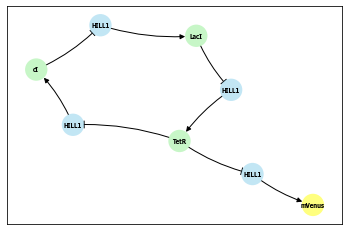

In [28]:
rep = lc.GeneticNetwork(vector=vector.id[0])

tetr_reg = lc.Regulator(name='TetR', degradation_rate=1, sbol_comp=geneproducts[1])
laci_reg = lc.Regulator(name='LacI', degradation_rate=1, init_concentration=5, sbol_comp=geneproducts[2])
ci_reg = lc.Regulator(name='cI', degradation_rate=1, sbol_comp=geneproducts[3])
rep.add_regulator([tetr_reg, laci_reg, ci_reg])

mven_rep = lc.Reporter(name='mVenus', degradation_rate=1, signal_id=yfp.id[0], sbol_comp=geneproducts[0], color='yellow')
rep.add_reporter(mven_rep)

laci_not_tetr = lc.Hill1(input=laci_reg, output=tetr_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_plac)
ci_not_laci = lc.Hill1(input=ci_reg, output=laci_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_plam)
tetr_not_ci = lc.Hill1(input=tetr_reg, output=ci_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_ptet)
tetr_not_mven = lc.Hill1(input=tetr_reg, output=mven_rep, alpha=[100,0], K=1, n=2, sbol_comp=op_ptet)
rep.add_operator([laci_not_tetr, ci_not_laci, tetr_not_ci, tetr_not_mven])
rep.draw()

In [29]:
repressilator_doc = rep.to_sbol(sbol_doc=doc)
for obj in repressilator_doc.objects:
    print(obj.identity)
report_sbol3 = repressilator_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ
https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ_seq
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/operator_plac
https://github.com/Gonza10V/operator_plam
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/RBS2
https://github.com/Gonza10V/RBS2_seq
https://github.com/Gonza10V/RBS3
https://github.com/Gonza10V/RBS3_seq
https://github.com/Gonza10V/mVenus
https://github.com/Gonza10V/mVenus_seq
https://github.com/Gonza10V/TetR
https://github.com/Gonza10V/TetR_seq
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/LamR
https://github.com/Gonza10V/LamR_seq
https://github.com/Gonza10V/M0050


## Save and Load

We will use the repressilator example to show the use of save_loica nad load_loica functions.
Here we create a functional repressillator and save it to a file. This provides a way to share designs and models. The file can be loaded in another workspace and modified to add an Operator with a Reporter to obtain data.

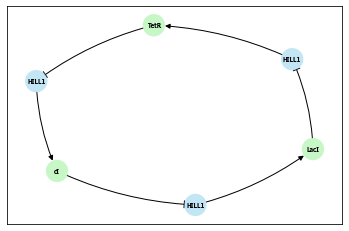

In [30]:
rep = lc.GeneticNetwork(vector=vector.id[0])

tetr_reg = lc.Regulator(name='TetR', degradation_rate=1, sbol_comp=geneproducts[1])
laci_reg = lc.Regulator(name='LacI', degradation_rate=1, init_concentration=5, sbol_comp=geneproducts[2])
ci_reg = lc.Regulator(name='cI', degradation_rate=1, sbol_comp=geneproducts[3])
rep.add_regulator([tetr_reg, laci_reg, ci_reg])

#mven_rep = lc.Reporter(name='mVenus', degradation_rate=1, signal_id=yfp.id[0], sbol_comp=geneproducts[0], color='yellow')
#rep.add_reporter(mven_rep)

laci_not_tetr = lc.Hill1(input=laci_reg, output=tetr_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_plac)
ci_not_laci = lc.Hill1(input=ci_reg, output=laci_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_plam)
tetr_not_ci = lc.Hill1(input=tetr_reg, output=ci_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_ptet)
#tetr_not_mven = lc.Hill1(input=tetr_reg, output=mven_rep, alpha=[100,0], K=1, n=2, sbol_comp=op_ptet)
rep.add_operator([laci_not_tetr, ci_not_laci, tetr_not_ci])#tetr_not_mven])
rep.draw()

In [31]:
lc.save_loica(rep, 'repressilator_mvenus')

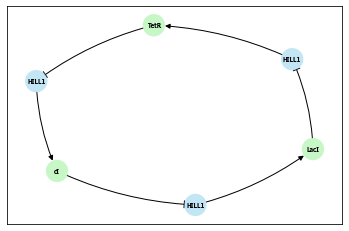

In [32]:
loaded_rep = lc.load_loica('repressilator_mvenus')
loaded_rep.draw()

### Naive Composite

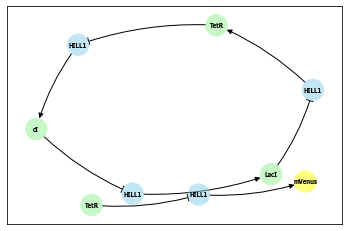

In [33]:
loaded_rep = lc.load_loica('repressilator_mvenus')
mven_rep = lc.Reporter(name='mVenus', degradation_rate=1, signal_id=yfp.id[0], sbol_comp=geneproducts[0], color='yellow')
loaded_rep.add_reporter(mven_rep)
tetr_not_mven = lc.Hill1(input=tetr_reg, output=mven_rep, alpha=[100,0], K=1, n=2, sbol_comp=op_ptet)
loaded_rep.add_operator([tetr_not_mven])
loaded_rep.draw()

### How to connect a new network to a loaded network

Loaded networks and newly created networks are not connected with the same objects. The loaded objects needs to be connected to the new parts providing a link from the loaded network to the new parts of the network. Run SBOL Connection before the following cells to obtain a valid SBOL Document.

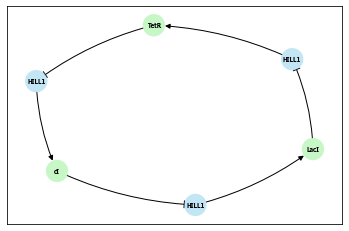

In [34]:
loaded_rep = lc.load_loica('repressilator_mvenus')
loaded_rep.draw()

In [35]:
for r in rep.regulators:
    print(r.name)

TetR
LacI
cI


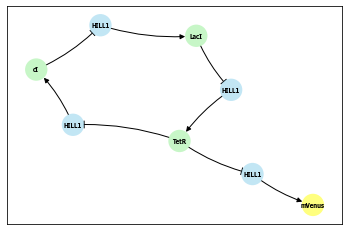

In [36]:
mven_rep = lc.Reporter(name='mVenus', degradation_rate=1, signal_id=yfp.id[0], sbol_comp=geneproducts[0], color='yellow')
loaded_rep.add_reporter(mven_rep)
tetr_not_mven = lc.Hill1(input=loaded_rep.regulators[0], output=mven_rep, alpha=[100,0], K=1, n=2, sbol_comp=op_ptet)
loaded_rep.add_operator([tetr_not_mven])
loaded_rep.draw()

To have a valid SBOL Document please run again the SBOL Connection cells and then the Save and load cells skipping the Naive Composite. This is to avoid having duplicated parts on the document from the first repressilator.

In [37]:
repressilator_doc = loaded_rep.to_sbol(sbol_doc=doc)
for obj in repressilator_doc.objects:
    print(obj.identity)
report_sbol3 = repressilator_doc.validate()
print(len(report_sbol3))

ValueError: An entity with identity "https://github.com/Gonza10V/LOICA_LacI_HILL1_TetR_model" already exists in document

In [ ]:
for error in report_sbol3.errors:
    print(error.object_id)
    print(error.message)

# Composed  GeneticNetwork

Here we will create a composed genetic newtwork or device. We have an HSL C4 Receiver that express LacI and a C6 Receiver that express TetR connected to a NOR Operator that express GFP regulated by LacI and TetR. This device is a NOR that express GFP as TRUE and the inputs are experimentally available signals C4 and C6.

# Receiver C4

## Flapjack Connection

In [ ]:
dna = fj.get('dna', name='AHL1_REC_GFP')
if len(dna)==0:
    dna = fj.create('dna', name='AHL1_REC_GFP')
vector = fj.get('vector', name='AHL1_REC_GFP')    
if len(vector)==0:
    vector = fj.create('vector', name='AHL1_REC_GFP', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [ ]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

hsl_c4 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329748866')
prhl, prhl_seq = component.promoter('pRhl','cagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttcTACTaGAGACCcacgtagtg ', description='https://synbiohub.org/public/igem/BBa_J23101/1')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
op_prhl = component.engineered_region('operator_ptet', [prhl,rbs1], description= 'LOICA Operator pRhl')

laci, laci_seq = component.cds('LacI', 'GTCCatggtgaatgtgaaaccagtaacgttatacgatgtcgcagagtatgccggtgtctcttatcagaccgtttcccgcgtggtgaaccaggccagccacgtttctgcgaaaacgcgggaaaaagtggaagcggcgatggcggagctgaattacattcccaaccgcgtggcacaacaactggcgggcaaacagtcgttgctgattggcgttgccacctccagtctggccctgcacgcgccgtcgcaaattgtcgcggcgattaaatctcgcgccgatcaactgggtgccagcgtggtggtgtcgatggtagaacgaagcggcgtcgaagcctgtaaagcggcggtgcacaatcttctcgcgcaacgcgtcagtgggctgatcattaactatccgctggatgaccaggatgccattgctgtggaagctgcctgcactaatgttccggcgttatttcttgatgtctctgaccagacacccatcaacagtattattttctcccatgaagacggtacgcgactgggcgtggagcatctggtcgcattgggtcaccagcaaatcgcgctgttagcgggcccattaagttctgtctcggcgcgtctgcgtctggctggctggcataaatatctcactcgcaatcaaattcagccgatagcggaacgggaaggcgactggagtgccatgtccggttttcaacaaaccatgcaaatgctgaatgagggcatcgttcccactgcgatgctggttgccaacgatcagatggcgctgggcgcaatgcgcgccattaccgagtccgggctgcgcgttggtgcggatatctcggtagtgggatacgacgataccgaagacagctcatgttatatcccgccgttaaccaccatcaaacaggattttcgcctgctggggcaaaccagcgtggaccgcttgctgcaactctctcagggccaggcggtgaagggcaatcagctgttgcccgtctcactggtgaaaagaaaaaccaccctggcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagGGCTCG', description='LacI Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')
gp_laci = geneproduct = component.engineered_region(f'geneproduct_{laci.display_id}_{m0050.display_id}_{ter1.display_id}', [laci, m0050, ter1], description='LOICA GeneProduct LacI')

doc.add([prhl, prhl_seq, rbs1, rbs1_seq, op_prhl, laci, laci_seq, m0050, m0050_seq, ter1, ter1_seq, gp_laci])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_LacI_M0050_TER1
0


## GeneticNetwork Construction

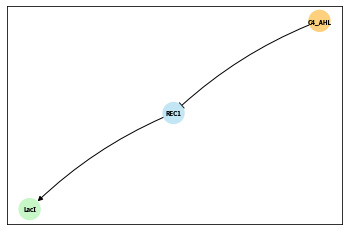

In [ ]:
rec1 = lc.GeneticNetwork(vector=vector.id[0])

laci_reg = lc.Regulator(name='LacI', degradation_rate=1, sbol_comp=gp_laci )
rec1.add_regulator(laci_reg)

ahl1 = lc.Supplement(name='C4_AHL', sbol_comp=hsl_c4, color='orange')

ahl1_REC_laci = lc.Receiver(input=ahl1, output=laci_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_prhl, name='REC1')
rec1.add_operator(ahl1_REC_laci)
rec1.draw()

In [ ]:
rec_doc = rec1.to_sbol(sbol_doc=doc)
for obj in rec_doc.objects:
    print(obj.identity)
report_sbol3 = rec_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_LacI_M0050_TER1
https://github.com/Gonza10V/LOICA_C4_AHL_REC1_LacI_model
https://github.com/Gonza10V/TU_C4_AHL_REC1_LacI
https://github.com/Gonza10V/C4_AHL_chemical
https://github.com/Gonza10V/LacI_protein
https://github.com/Gonza10V/geneticnetwork
0


Here we save the network to a file to use it later.

In [ ]:
lc.save_loica(rec1, 'hsl1_REC_laci')

# Receiver C6

## Flapjack Connection

In [ ]:
dna = fj.get('dna', name='AHL2_REC_TetR')
if len(dna)==0:
    dna = fj.create('dna', name='AHL2_REC_TetR')
vector = fj.get('vector', name='AHL2_REC_TetR')    
if len(vector)==0:
    vector = fj.create('vector', name='AHL2_REC_TetR', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [ ]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

hsl_c6 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329758205')
plux, plux_seq = component.promoter('pRhl','cagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttcTACTaGAGACCcacgtagtg ', description='https://synbiohub.org/public/igem/BBa_J23101/1')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
op_plux = component.engineered_region('operator_ptet', [plux,rbs1], description= 'LOICA Operator pRhl')

tetr, tetr_seq = component.cds('TetR', 'GTCCatgtccagattagataaaagtaaagtgattaacagcgcattagagctgcttaatgaggtcggaatcgaaggtttaacaacccgtaaactcgcccagaagctaggtgtagagcagcctacattgtattggcatgtaaaaaataagcgggctttgctcgacgccttagccattgagatgttagataggcaccatactcacttttgccctttagaaggggaaagctggcaagattttttacgtaataacgctaaaagttttagatgtgctttactaagtcatcgcgatggagcaaaagtacatttaggtacacggcctacagaaaaacagtatgaaactctcgaaaatcaattagcctttttatgccaacaaggtttttcactagagaatgcattatatgcactcagcgctgtggggcattttactttaggttgcgtattggaagatcaagagcatcaagtcgctaaagaagaaagggaaacacctactactgatagtatgccgccattattacgacaagctatcgaattatttgatcaccaaggtgcagagccagccttcttattcggccttgaattgatcatatgcggattagaaaaacaacttaaatgtgaaagtgggtctGGCTCG',description='TetR Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')
gp_tetr = geneproduct = component.engineered_region(f'geneproduct_{tetr.display_id}_{m0050.display_id}_{ter1.display_id}', [tetr, m0050, ter1], description='LOICA GeneProduct TetR')

doc.add([plux, plux_seq, rbs1, rbs1_seq, op_plux, tetr, tetr_seq, m0050, m0050_seq, ter1, ter1_seq, gp_tetr])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/TetR
https://github.com/Gonza10V/TetR_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_TetR_M0050_TER1
0


## GeneticNetwork Construction

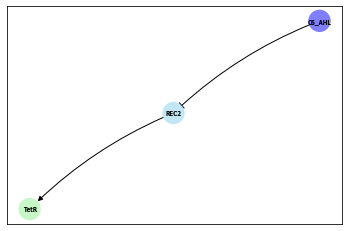

In [ ]:
rec2 = lc.GeneticNetwork(vector=vector.id[0])

tetr_reg = lc.Regulator(name='TetR', degradation_rate=1, sbol_comp=gp_tetr)
rec2.add_regulator(tetr_reg)

ahl2 = lc.Supplement(name='C6_AHL', sbol_comp=hsl_c6, color='blue')

ahl2_REC_tetr = lc.Receiver(input=ahl2, output=tetr_reg, alpha=[100,0], K=1, n=2, sbol_comp=op_plux, name='REC2')
rec2.add_operator(ahl2_REC_tetr)
rec2.draw()

In [ ]:
rec_doc = rec2.to_sbol(sbol_doc=doc)
for obj in rec_doc.objects:
    print(obj.identity)
report_sbol3 = rec_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/pRhl
https://github.com/Gonza10V/pRhl_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/TetR
https://github.com/Gonza10V/TetR_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_TetR_M0050_TER1
https://github.com/Gonza10V/LOICA_C6_AHL_REC2_TetR_model
https://github.com/Gonza10V/TU_C6_AHL_REC2_TetR
https://github.com/Gonza10V/TetR_protein
https://github.com/Gonza10V/C6_AHL_chemical
https://github.com/Gonza10V/geneticnetwork
0


Here we save the network to a file to use it later.

In [ ]:
lc.save_loica(rec2, 'hsl2_REC_tetr')

# LacI_TetR_NOR_GFP

## Flapjack Connection

In [ ]:
dna_rec1 = fj.create('dna', name='AHL1_REC_TetR')
dna_rec2 = fj.create('dna', name='AHL2_REC_LacI')
dna_NOR = fj.create('dna', name='LacI_TetR_NOR_GFP')
vector = fj.create('vector', name='AHL1_AHL2_NOR_GFP', dnas=[dna_rec1.id, dna_rec2.id, dna_NOR.id])   
study = fj.create('study', name='Loica testing', description='Test')
media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.create('strain', name='Loica strain', description='Loica test strain')  
gfp = fj.get('signal', name='GFP')
biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

Problem deleting media id=8:
{"detail":"You do not have permission to perform this action."}
Problem deleting strain id=4:
{"detail":"You do not have permission to perform this action."}


## SBOL Connection

In [ ]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

tdm_pro, tdm_pro_seq = component.promoter('TP_laci_tetr','cagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttccctttccgaaacgaaacaagttggattttgccagtcgggGGTCTCaGGAGtcctgtgaaatctggcagttaccgttagctttcgaattggctaaaaagtgttccctttccgaaacgaaacaagttggattttgc acctaccagaactggtagttctgacctgtggctatcttcgaaggcatcgatattatgcacattggaactcttcatgacataacgccgagTACTaGAGACCcacgtagtg ', description='https://synbiohub.org/public/igem/BBa_J23101/1')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')

op_tdm_pro = component.engineered_region('operator_ptet', [tdm_pro,rbs1], description= 'LOICA Operator J23101')

gfpm3, gfpm3_seq = component.cds('GFP_mut3', 'atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagcgcgaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaa', description='GFP mut3 Coding Sequence, no BsaI site, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')

gp_gfp = geneproduct = component.engineered_region(f'geneproduct_{gfpm3.display_id}_{m0050.display_id}_{ter1.display_id}', [gfpm3, m0050, ter1], description='LOICA GeneProduct GFP')

hsl_c4 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329748866')
hsl_c6 = component.ed_simple_chemical('https://pubchem.ncbi.nlm.nih.gov/substance/329748862')
doc.add([tdm_pro, tdm_pro_seq, rbs1, rbs1_seq, op_tdm_pro, gfpm3, gfpm3_seq, m0050, m0050_seq, ter1, ter1_seq, gp_gfp])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/TP_laci_tetr
https://github.com/Gonza10V/TP_laci_tetr_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
0


## GeneticNetwork Construction

Load GeneticalNetwork from file.

In [ ]:
hsl1_REC_laci = lc.load_loica('hsl1_REC_laci')

In [ ]:
hsl1_REC_laci.regulators[0].name

'LacI'

In [ ]:
hsl2_REC_tetr = lc.load_loica('hsl2_REC_tetr')

Using the loaded Receivers we can create a new network that will be composed of the two receivers and the NOR. Be care oaboutn how you wire the network, the draw function can be used for visual inspection of the design.

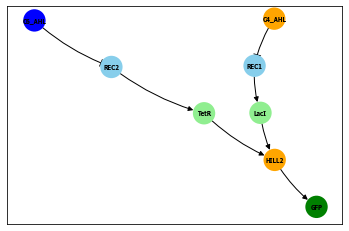

In [ ]:
nor_ex = lc.GeneticNetwork(vector=vector.id[0])

gfp_rep = lc.Reporter(name='GFP', degradation_rate=1, signal_id=1, sbol_comp=gp_gfp, color='green')
nor_ex.add_reporter(gfp_rep)

nor_ex.add_operator([hsl1_REC_laci.operators[0], hsl2_REC_tetr.operators[0]])

laci = hsl1_REC_laci.regulators[0]
tetr = hsl2_REC_tetr.regulators[0]

nor_ex.add_operator(lc.Hill2(input=[laci, tetr], output=gfp_rep, 
                    alpha=[0.0001,1,1,0], K=[1,1], n=[2,2], sbol_comp=op_tdm_pro))
nor_ex.draw(alpha=1)

# NOT (Hill1) bicistronic

## Flapjack Connection

In [3]:
dna = fj.get('dna', name='LacI_NOT_GFP')
if len(dna)==0:
    dna = fj.create('dna', name='LacI_NOT_GFP')
vector = fj.get('vector', name='LacI_NOT_GFP')    
if len(vector)==0:
    vector = fj.create('vector', name='LacI_NOT_GFP', dnas=dna.id)   
study = fj.get('study', name='Loica testing')
if len(study)==0:
    study = fj.create('study', name='Loica testing', description='Test')
media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')
    
gfp = fj.get('signal', name='GFP')

biomass_signal = fj.get('signal', name='OD')

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)

## SBOL Connection

In [4]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

plac, plac_seq = component.promoter('L3S2P11_UPA20_pLac_RiboJ10', 'GTCCCTCGGTACCAAATTCCAGAAAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTcctttcgtcttcacctcgagaattgtgagcggataacaattgacattgtgagcggataacaagatactgagcacatcagcaggacgcactgaccgaattcattAGCGCTCAACGGGTGTGCTTCCCGTTCTGATGAGTCCGTGAGGACGAAAGCGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin pLac (based on B-P39-pLac-F2)')
rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
op_plac = component.engineered_region('operator_ptet', [plac,rbs1], description= 'LOICA Operator pLac')

gfpm3, gfpm3_seq = component.cds('GFP_mut3', 'atgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagcgcgaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaa', description='GFP mut3 Coding Sequence, no BsaI site, no stop codon')
m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')
gp_gfp = geneproduct = component.engineered_region(f'geneproduct_{gfpm3.display_id}_{m0050.display_id}_{ter1.display_id}', [gfpm3, m0050, ter1], description='LOICA GeneProduct GFP')

laci, laci_seq = component.cds('LacI', 'GTCCatggtgaatgtgaaaccagtaacgttatacgatgtcgcagagtatgccggtgtctcttatcagaccgtttcccgcgtggtgaaccaggccagccacgtttctgcgaaaacgcgggaaaaagtggaagcggcgatggcggagctgaattacattcccaaccgcgtggcacaacaactggcgggcaaacagtcgttgctgattggcgttgccacctccagtctggccctgcacgcgccgtcgcaaattgtcgcggcgattaaatctcgcgccgatcaactgggtgccagcgtggtggtgtcgatggtagaacgaagcggcgtcgaagcctgtaaagcggcggtgcacaatcttctcgcgcaacgcgtcagtgggctgatcattaactatccgctggatgaccaggatgccattgctgtggaagctgcctgcactaatgttccggcgttatttcttgatgtctctgaccagacacccatcaacagtattattttctcccatgaagacggtacgcgactgggcgtggagcatctggtcgcattgggtcaccagcaaatcgcgctgttagcgggcccattaagttctgtctcggcgcgtctgcgtctggctggctggcataaatatctcactcgcaatcaaattcagccgatagcggaacgggaaggcgactggagtgccatgtccggttttcaacaaaccatgcaaatgctgaatgagggcatcgttcccactgcgatgctggttgccaacgatcagatggcgctgggcgcaatgcgcgccattaccgagtccgggctgcgcgttggtgcggatatctcggtagtgggatacgacgataccgaagacagctcatgttatatcccgccgttaaccaccatcaaacaggattttcgcctgctggggcaaaccagcgtggaccgcttgctgcaactctctcagggccaggcggtgaagggcaatcagctgttgcccgtctcactggtgaaaagaaaaaccaccctggcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagGGCTCG', description='LacI Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
gp_laci = geneproduct = component.engineered_region(f'geneproduct_{laci.display_id}_{m0050.display_id}_{ter1.display_id}', [laci, m0050, ter1], description='LOICA GeneProduct LacI')

doc.add([plac, plac_seq, rbs1, rbs1_seq, op_plac, gfpm3, gfpm3_seq, m0050, m0050_seq, ter1, ter1_seq, gp_gfp, laci, laci_seq, gp_laci])

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/geneproduct_LacI_M0050_TER1
0


## GeneticNetwork Construction

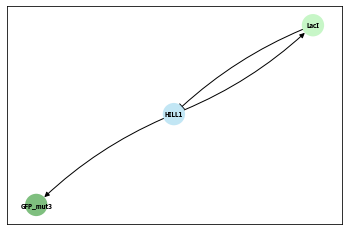

In [5]:
inv = lc.GeneticNetwork(vector=vector.id[0])

gfp_rep = lc.Reporter(name='GFP_mut3', degradation_rate=1, signal_id=gfp.id[0], sbol_comp=gp_gfp, color='green')
inv.add_reporter([gfp_rep])

laci_reg = lc.Regulator(name='LacI', degradation_rate=1, init_concentration=5, sbol_comp=gp_laci)
inv.add_regulator(laci_reg)

laci_NOT_gfp = lc.Hill1(input=laci_reg, output=[gfp_rep, laci_reg], alpha=[100,0], K=1, n=2, sbol_comp=op_plac)
inv.add_operator(laci_NOT_gfp)
inv.draw()

In [6]:
inv_doc = inv.to_sbol(sbol_doc=doc)
for obj in inv_doc.objects:
    print(obj.identity)
report_sbol3 = inv_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/GFP_mut3
https://github.com/Gonza10V/GFP_mut3_seq
https://github.com/Gonza10V/M0050
https://github.com/Gonza10V/M0050_seq
https://github.com/Gonza10V/TER1
https://github.com/Gonza10V/TER1_seq
https://github.com/Gonza10V/geneproduct_GFP_mut3_M0050_TER1
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/geneproduct_LacI_M0050_TER1
https://github.com/Gonza10V/LOICA_LacI_HILL1_GFP_mut3_LacI_model
https://github.com/Gonza10V/TU_LacI_HILL1_GFP_mut3_LacI
https://github.com/Gonza10V/LacI_protein
https://github.com/Gonza10V/GFP_mut3_protein
https://github.com/Gonza10V/geneticnetwork
0


In [7]:
for error in report_sbol3.errors:
    print(error.object_id)
    print(error.message)

# END